# Scrapping Data

In [ ]:
!pip install google-play-scraper

## gunakan library scraping google play

In [ ]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks


In [ ]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt_tab')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# mulai Scraping Data

In [ ]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews_all, Sort

# Mengambil semua ulasan dari aplikasi dengan ID 'com.byu.id' di Google Play Store.
# Proses scraping mungkin memerlukan beberapa saat tergantung pada jumlah ulasan yang ada.
scrapreview = reviews_all(
    'com.telkomsel.telkomselcm',          # ID aplikasi
    lang='id',             # Bahasa ulasan (default: 'en')
    country='id',          # Negara (default: 'us')
    sort=Sort.MOST_RELEVANT, # Urutan ulasan (default: Sort.MOST_RELEVANT)
    count=15000             # Jumlah maksimum ulasan yang ingin diambil
)

## Menyimpan data yang telah discraping dalam bentuk csv

In [ ]:
# Menyimpan ulasan dalam file CSV
import csv

with open('ulasan_aplikasi.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])  # Menulis header kolom
    for review in scrapreview:
        writer.writerow([review['content']])  # Menulis konten ulasan ke dalam file CSV

# Loading Data

In [ ]:
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('ulasan_aplikasi.csv', index=False)

In [ ]:
# Membuat DataFrame dari hasil scrapreview
app_reviews_df = pd.DataFrame(scrapreview)

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,ce590d13-60cc-4f25-8092-e4a3430cf849,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Makin hari makin BURUK! segala upaya biar lancar masuk aplikasi tetap ga berubah! clear cache/install ulang aplikasi tetap BERAT! kebanyakan ""fitur"" ga penting! Menu Homepage aja buat liat kuota/pulsa loadingnya parah,LAMA.. Aplikasi cuma buat liat kuota/pulsa/beli paket data lemotnya ngelebihin aplikasi Online Shop! sering crash,kadang force close.Ada stamp harian berhadiah pun percuma kalo buka Aplikasi lemot kaya begitu.",1,2269,8.6.2,2025-01-25 18:08:25,"Hai Kak RNP. Mohon maaf untuk ketidaknyamanannya ya, apabila aplikasi MyTelkomsel terlalu berat di handphone kakak, silakan coba unduh MyTelkomsel Basic. Aplikasi ini sudah tersedia di PlayStore. Apabila masih mengalami kendala, silakan hubungi kami melalui DM Instagram @Telkomsel atau chat di tsel.id/chatva. Semoga membantu. -Sekar",2025-01-26 04:44:33,8.6.2
1,a0b9f48e-bc50-403c-8958-ed95b59ea541,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Kirain di hp saya doang yang sering stuck di beranda. Tapi ampir semua kayanya, tolong segara di benahi jangan sinyal nya aja yg terus di tingkatkan faktor pendukung nya juga ditingkatkan seperti apk nya masa mau cek kuota aja harus install ulang apk nya ga lama setelah itu stuck lagi, kalo ngomongin dari spek hp buat game berat masih lancar"" aja kok lah ini cuman buka apk 600mb+ an malah stuck. Tolong segara di perbaiki dan terimakasih.🙏",2,26,8.6.2,2025-02-03 11:58:27,None,NaT,8.6.2
2,3867fbac-0570-4a79-9fa9-d3d37cfd7ceb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"percuma beri ulasan tapi gak pernah di tanggapi, perbaiki lah aplikasi nya terlalu berat dan loading nya lama banget terlalu banyak bug aplikasi ini, banyak fitur' yang ga berguna juga. percuma juga si ngetik gini kaga bakal diperbaiki aplikasinya. yaaah semoga aja lah di liat dan diperbaiki aplikasi ini.",1,80,8.6.2,2025-02-01 11:20:43,"Maaf ya, Kak Rafi. Terkait kendala aplikasi MyTelkomsel. Yuk hubungi mimin untuk dibantu lebih lanjut melalui email cs@telkomsel.com atau Instagram @Telkomsel. Mimin tunggu ya :) -Sekar",2024-08-13 23:39:02,8.6.2
3,77861768-5604-4fc2-994e-0f5303917232,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Di versi 8.6.2, versi paling nyebelin menurut saya. Kenapa? Seh ini aplikasi harus sering-sering logout (hapus data) terus relogin akun lagi, kalo enggak begitu data akun di aplikasinya enggak keupdate (udah lebih dari 3x). Pernah liat di aplikasi kuota masih banyak, pas di relogin seh tuh kuota ternyata tinggal dikit Tolong di perbaiki",1,16,8.6.2,2025-02-03 01:48:12,None,NaT,8.6.2
4,8c98eb5a-8b2e-43f4-9f53-0cecf85b59c8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Udah berkali-kali bersihkan cache uninstall terus install ulang berkali-kali tetap tidak ada pergerakan , Liat ulasan laen operatornya bilang apk nya berat , Kurang gede apa ram 8 masih ga guna juga ini apk. Kalopun ga ada perubahan pindah provider lain dah. Signal juga makin lama makin lag terus kalah sama XL",1,54,8.6.2,2025-02-01 16:17:11,"Hai, Kak Hasan. Mohon maaf untuk ketidaknyamanannya ya, apabila aplikasi MyTelkomsel terlalu berat di handphone Kakak, silakan coba unduh MyTelkomsel Basic. Aplikasi ini sudah tersedia di PlayStore. Apabila masih mengalami kendala, silakan hubungi kami melalui DM Instagram @Telkomsel atau chat di tsel.id/chatva. Semoga membantu. :) -Ken",2025-02-02 13:29:55,8.6.2


In [ ]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144000 entries, 0 to 143999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              144000 non-null  object        
 1   userName              144000 non-null  object        
 2   userImage             144000 non-null  object        
 3   content               144000 non-null  object        
 4   score                 144000 non-null  int64         
 5   thumbsUpCount         144000 non-null  int64         
 6   reviewCreatedVersion  118947 non-null  object        
 7   at                    144000 non-null  datetime64[ns]
 8   replyContent          72392 non-null   object        
 9   repliedAt             72392 non-null   datetime64[ns]
 10  appVersion            118947 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 12.1+ MB


In [ ]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna()

clean_df.shape

(59480, 11)

# Preprossesing

In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,ce590d13-60cc-4f25-8092-e4a3430cf849,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Makin hari makin BURUK! segala upaya biar lancar masuk aplikasi tetap ga berubah! clear cache/install ulang aplikasi tetap BERAT! kebanyakan ""fitur"" ga penting! Menu Homepage aja buat liat kuota/pulsa loadingnya parah,LAMA.. Aplikasi cuma buat liat kuota/pulsa/beli paket data lemotnya ngelebihin aplikasi Online Shop! sering crash,kadang force close.Ada stamp harian berhadiah pun percuma kalo buka Aplikasi lemot kaya begitu.",1,2269,8.6.2,2025-01-25 18:08:25,"Hai Kak RNP. Mohon maaf untuk ketidaknyamanannya ya, apabila aplikasi MyTelkomsel terlalu berat di handphone kakak, silakan coba unduh MyTelkomsel Basic. Aplikasi ini sudah tersedia di PlayStore. Apabila masih mengalami kendala, silakan hubungi kami melalui DM Instagram @Telkomsel atau chat di tsel.id/chatva. Semoga membantu. -Sekar",2025-01-26 04:44:33,8.6.2
2,3867fbac-0570-4a79-9fa9-d3d37cfd7ceb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"percuma beri ulasan tapi gak pernah di tanggapi, perbaiki lah aplikasi nya terlalu berat dan loading nya lama banget terlalu banyak bug aplikasi ini, banyak fitur' yang ga berguna juga. percuma juga si ngetik gini kaga bakal diperbaiki aplikasinya. yaaah semoga aja lah di liat dan diperbaiki aplikasi ini.",1,80,8.6.2,2025-02-01 11:20:43,"Maaf ya, Kak Rafi. Terkait kendala aplikasi MyTelkomsel. Yuk hubungi mimin untuk dibantu lebih lanjut melalui email cs@telkomsel.com atau Instagram @Telkomsel. Mimin tunggu ya :) -Sekar",2024-08-13 23:39:02,8.6.2
4,8c98eb5a-8b2e-43f4-9f53-0cecf85b59c8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Udah berkali-kali bersihkan cache uninstall terus install ulang berkali-kali tetap tidak ada pergerakan , Liat ulasan laen operatornya bilang apk nya berat , Kurang gede apa ram 8 masih ga guna juga ini apk. Kalopun ga ada perubahan pindah provider lain dah. Signal juga makin lama makin lag terus kalah sama XL",1,54,8.6.2,2025-02-01 16:17:11,"Hai, Kak Hasan. Mohon maaf untuk ketidaknyamanannya ya, apabila aplikasi MyTelkomsel terlalu berat di handphone Kakak, silakan coba unduh MyTelkomsel Basic. Aplikasi ini sudah tersedia di PlayStore. Apabila masih mengalami kendala, silakan hubungi kami melalui DM Instagram @Telkomsel atau chat di tsel.id/chatva. Semoga membantu. :) -Ken",2025-02-02 13:29:55,8.6.2
8,168c3318-ff28-4c4b-a3b5-f2e9c53b80a0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Sebenarnya sudah mulai bosan, sebab masalahnya selalu itu saja. Seolah-olah tidak akan pernah diperbaiki. Klaim app adalah kemudahan, namun app ini sendiri tidaklah efisien, sangat berat, menguras baterai, bahkan app ini mengkonsumsi kuota yg banyak dengan banyaknya item penawaran yg kebanyakan orang tidaklah butuh. App ini hampir sama dg game berat, yg menjadi dampaknya adalah yg menggunakan spesifikasi hp kelas bawah meskipun keluaran terbaru.",1,846,8.6.2,2025-01-23 01:11:23,"Hai Kak Kurniadi. Mohon maaf untuk ketidaknyamanannya ya, apabila aplikasi MyTelkomsel terlalu berat di handphone kakak, silakan coba unduh MyTelkomsel Basic. Aplikasi ini sudah tersedia di PlayStore. Apabila masih mengalami kendala, silakan hubungi kami melalui DM Instagram @Telkomsel atau chat di tsel.id/chatva. Semoga membantu. -Sekar",2025-01-23 03:57:10,8.6.2
9,9d1f7905-79d7-48ae-b80d-574f21810f20,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aplikasi yg sulit diakses, meski menggunakan jaringannya s

In [ ]:
clean_df.duplicated().sum()

0

In [ ]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,ce590d13-60cc-4f25-8092-e4a3430cf849,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Makin hari makin BURUK! segala upaya biar lancar masuk aplikasi tetap ga berubah! clear cache/install ulang aplikasi tetap BERAT! kebanyakan ""fitur"" ga penting! Menu Homepage aja buat liat kuota/pulsa loadingnya parah,LAMA.. Aplikasi cuma buat liat kuota/pulsa/beli paket data lemotnya ngelebihin aplikasi Online Shop! sering crash,kadang force close.Ada stamp harian berhadiah pun percuma kalo buka Aplikasi lemot kaya begitu.",1,2269,8.6.2,2025-01-25 18:08:25,"Hai Kak RNP. Mohon maaf untuk ketidaknyamanannya ya, apabila aplikasi MyTelkomsel terlalu berat di handphone kakak, silakan coba unduh MyTelkomsel Basic. Aplikasi ini sudah tersedia di PlayStore. Apabila masih mengalami kendala, silakan hubungi kami melalui DM Instagram @Telkomsel atau chat di tsel.id/chatva. Semoga membantu. -Sekar",2025-01-26 04:44:33,8.6.2,Makin hari makin BURUK segala upaya biar lancar masuk aplikasi tetap ga berubah clear cacheinstall ulang aplikasi tetap BERAT kebanyakan fitur ga penting Menu Homepage aja buat liat kuotapulsa loadingnya parahLAMA Aplikasi cuma buat liat kuotapulsabeli paket data lemotnya ngelebihin aplikasi Online Shop sering crashkadang force closeAda stamp harian berhadiah pun percuma kalo buka Aplikasi lemot kaya begitu,makin hari makin buruk segala upaya biar lancar masuk aplikasi tetap ga berubah clear cacheinstall ulang aplikasi tetap berat kebanyakan fitur ga penting menu homepage aja buat liat kuotapulsa loadingnya parahlama aplikasi cuma buat liat kuotapulsabeli paket data lemotnya ngelebihin aplikasi online shop sering crashkadang force closeada stamp harian berhadiah pun percuma kalo buka aplikasi lemot kaya begitu,makin hari makin buruk segala upaya biar lancar masuk aplikasi tetap ga berubah clear cacheinstall ulang aplikasi tetap berat kebanyakan fitur ga penting menu homepage saja buat lihat kuotapulsa loadingnya parahlama aplikasi cuma buat lihat kuotapulsabeli paket data lemotnya ngelebihin aplikasi online shop sering crashkadang force closeada stamp harian berhadiah pun percuma kalau buka aplikasi lambat kaya begitu,"[makin, hari, makin, buruk, segala, upaya, biar, lancar, masuk, aplikasi, tetap, ga, berubah, clear, cacheinstall, ulang, aplikasi, tetap, berat, kebanyakan, fitur, ga, penting, menu, homepage, saja, buat, lihat, kuotapulsa, loadingnya, parahlama, aplikasi, cuma, buat, lihat, kuotapulsabeli, paket, data, lemotnya, ngelebihin, aplikasi, online, shop, sering, crashkadang, force, closeada, stamp, harian, berhadiah, pun, percuma, kalau, buka, aplikasi, lambat, kaya, begitu]","[buruk, upaya, biar, lancar, masuk, aplikasi, berubah, clear, cacheinstall, ulang, aplikasi, berat, kebanyakan, fitur, menu, homepage, lihat, kuotapulsa, loadingnya, parahlama, aplikasi, lihat, kuotapulsabeli, paket, data, lemotnya, ngelebihin, aplikasi, online, shop, crashkadang, force, closeada, stamp, harian, berhadiah, buka, aplikasi, lambat, kaya]",buruk upaya biar lancar masuk aplikasi berubah clear cacheinstall ulang aplikasi berat kebanyakan fitur menu homepage lihat kuotapulsa loadingnya parahlama aplikasi lihat kuotapulsabeli paket data lemotnya ngelebihin aplikasi online shop crashkadang force closeada stamp harian berhadiah buka aplikasi lambat kaya
2,3867fbac-0570-4a79-9fa9-d3d37cfd7ceb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"percuma beri ulasan tapi gak pernah di tanggapi, perbaiki lah aplikasi nya terlalu berat dan loading nya lama banget terlalu banyak bug aplikasi ini, banyak fitur' yang ga berguna juga. percuma juga si ngetik gini kaga bakal 

# Pelabelan

In [ ]:
import csv
import requests
from io import StringIO

# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

# Membuat kamus untuk lexicon netral
lexicon_neutral = dict()

def tambahkan_kata(kamus, kata, skor):
    kamus[kata] = skor

# Menambahkan kata-kata positif tambahan
tambahkan_kata(lexicon_positive, "akurat", 1)


# Menambahkan kata-kata negatif tambahan
tambahkan_kata(lexicon_negative, "lambat", -1)
tambahkan_kata(lexicon_negative, "mahal", -1)
tambahkan_kata(lexicon_negative, "kecewa", -1)


In [ ]:
# Function to determine sentiment polarity of tweets
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
    elif (score == 0):
        polarity = 'neutral'
        # Jika skor sentimen sama dengan 0, maka polaritas adalah netral


    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [ ]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    38190
positive    21290
Name: count, dtype: int64


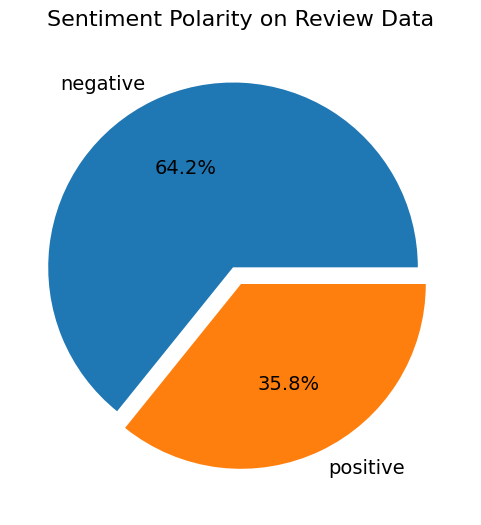

In [ ]:
import matplotlib.pyplot as plt

# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in clean_df['polarity'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'labels'.
labels = list(clean_df['polarity'].value_counts().index)

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.1 artinya potongan pertama akan sedikit terpisah).
explode = (0.1, 0)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()

In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = clean_df[clean_df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun.
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

positive_tweets

,text_akhir,polarity_score,polarity,text_stopword
1,mari edit ulasan tsel ok pelayanan ok harga ok mahal provider terburuk dunia aplikasi ok fitur ok lock pulsa terpakai paket data habis via aplikasi kesehatan ok emosi ok bikin hati senang ok stabilitas sinyal ok stabilitas speed net ok harga wifi ok kasih bintang tsel,55,positive,"[mari, edit, ulasan, tsel, ok, pelayanan, ok, harga, ok, mahal, provider, terburuk, dunia, aplikasi, ok, fitur, ok, lock, pulsa, terpakai, paket, data, habis, via, aplikasi, kesehatan, ok, emosi, ok, bikin, hati, senang, ok, stabilitas, sinyal, ok, stabilitas, speed, net, ok, harga, wifi, ok, kasih, bintang, tsel]"
2,make telkomsel nyaman tenang paket internet malam tersedia pilihan gb min tolonglah serakah banget sya paket malam sediain beragam pilihan sya tenang bersyukur suka paket malam harganya mantap nunggu malam tolong min munculkan paket malamnya,50,positive,"[make, telkomsel, nyaman, tenang, paket, internet, malam, tersedia, pilihan, gb, min, tolonglah, serakah, banget, sya, paket, malam, sediain, beragam, pilihan, sya, tenang, bersyukur, suka, paket, malam, harganya, mantap, nunggu, malam, tolong, min, munculkan, paket, malamnya]"
3,harga paket telkomsel loop paket combo paket promo harga kaya harga paket promo muncul please minn turunin harga paketan telkomsel loop combo sakti paket paket promonya please adain permanen harga murah langganan setia loop paket promo permanen darii telkomsel loopnya please min pelanggan setia tsel loop,48,positive,"[harga, paket, telkomsel, loop, paket, combo, paket, promo, harga, kaya, harga, paket, promo, muncul, please, minn, turunin, harga, paketan, telkomsel, loop, combo, sakti, paket, paket, promonya, please, adain, permanen, harga, murah, langganan, setia, loop, paket, promo, permanen, darii, telkomsel, loopnya, please, min, pelanggan, setia, tsel, loop]"
4,hallo harga sesuai kualitas harga elit kualitas sulit tolong prioritas kualitas bandingkan harga terkadang jaringan kadang hilang kadang timbul orang kadang sibuk lambat tolong kualitas sesuai harga masak kalah kartu mikir ajaa operator mikir dikit pakai otak bikin kualitas sesuai harga ba,48,positive,"[hallo, harga, sesuai, kualitas, harga, elit, kualitas, sulit, tolong, prioritas, kualitas, bandingkan, harga, terkadang, jaringan, kadang, hilang, kadang, timbul, orang, kadang, sibuk, lambat, tolong, kualitas, sesuai, harga, masak, kalah, kartu, mikir, ajaa, operator, mikir, dikit, pakai, otak, bikin, kualitas, sesuai, harga, ba]"
5,layanan telkomsel buruk pket internet mahal sesuai kecepatan internetnya bermasalah lambat proses transaksi aktivasi paket internet mengalami gangguan berulang ulang berhasil jam jam proses transaksi aktivasi paket lakukan berhasil diproses nyaman coba mengubungi cs veronika layanan nyaman,46,positive,"[layanan, telkomsel, buruk, pket, internet, mahal, sesuai, kecepatan, internetnya, bermasalah, lambat, proses, transaksi, aktivasi, paket, internet, mengalami, gangguan, berulang, ulang, berhasil, jam, jam, proses, transaksi, aktivasi, paket, lakukan, berhasil, diproses, nyaman, coba, mengubungi, cs, veronika, layanan, nyaman]"
...,...,...,...,...
21286,apk telkomsel buka,0,positive,"[apk, telkomsel, buka]"
21287,apk buka,0,positive,"[apk, buka]"
21288,daerah provinsi sumatera utara kabupaten tapanuli utara mohon sinyalnya mohon perlancar taikkkkkk,0,positive,"[daerah, provinsi, sumatera, utara, kabupaten, tapanuli, utara, mohon, sinyalnya, mohon, perlancar, taikkkkkk]"
21289,dibuka yamohon diperbikin,0,positive,"[dibuka, yamohon, diperbikin]"


In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = clean_df[clean_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

negative_tweets

,text_akhir,polarity_score,polarity,text_stopword
1,berfungsi cek kuota manual dial aplikasi disaat kuota menipis membuka aplikasi wifi aplikasi membeli paket kuota aplikasi error kali informasi sisa kuota dicantumkan aplikasi salah salah alasan cek sisa kuota manual kecewa berpikir uninstal aplikasi buruk,-70,negative,"[berfungsi, cek, kuota, manual, dial, aplikasi, disaat, kuota, menipis, membuka, aplikasi, wifi, aplikasi, membeli, paket, kuota, aplikasi, error, kali, informasi, sisa, kuota, dicantumkan, aplikasi, salah, salah, alasan, cek, sisa, kuota, manual, kecewa, berpikir, uninstal, aplikasi, buruk]"
2,aplikasi update berat cek sisa kuota persulit loadingnya ampun tata letak sisa kota aktif langsung klik kota aktif muncul itupun loading parah aplikasi cek sisa kota aktif sisa pulsa mah aplikasinya kebnyakan fitur transaksi orang suka aplikasi aplikasi shoping parah cek kuota persulit parah anjy,-66,negative,"[aplikasi, update, berat, cek, sisa, kuota, persulit, loadingnya, ampun, tata, letak, sisa, kota, aktif, langsung, klik, kota, aktif, muncul, itupun, loading, parah, aplikasi, cek, sisa, kota, aktif, sisa, pulsa, mah, aplikasinya, kebnyakan, fitur, transaksi, orang, suka, aplikasi, aplikasi, shoping, parah, cek, kuota, persulit, parah, anjy]"
3,email bohong melulu telkomsel penipu pulsa masuk bilang masuk nungguin tanggal agustus tanggal september bilang pulsa masuk terpakai pulsa masuk paket data non aktifkan sms telpon tanggal pulsa masuk ubah bintang pulsa masuk bukti balas,-62,negative,"[email, bohong, melulu, telkomsel, penipu, pulsa, masuk, bilang, masuk, nungguin, tanggal, agustus, tanggal, september, bilang, pulsa, masuk, terpakai, pulsa, masuk, paket, data, non, aktifkan, sms, telpon, tanggal, pulsa, masuk, ubah, bintang, pulsa, masuk, bukti, balas]"
4,aplikasi busuk mohon maaf udh rugi rb pembayaran isi ulang kuota via aplikasi busuk metode pembayaran mbanking bca masuk saldo berkurang nihh mencoba pembelian notif masuk sukses mohon telkomsel makan gaji buta udh rugi rb pembelian ntah gagal notif sukses pas cek via aplikasi bertambah,-60,negative,"[aplikasi, busuk, mohon, maaf, udh, rugi, rb, pembayaran, isi, ulang, kuota, via, aplikasi, busuk, metode, pembayaran, mbanking, bca, masuk, saldo, berkurang, nihh, mencoba, pembelian, notif, masuk, sukses, mohon, telkomsel, makan, gaji, buta, udh, rugi, rb, pembelian, ntah, gagal, notif, sukses, pas, cek, via, aplikasi, bertambah]"
5,parah banget aplikasi ngelag banget update cek kuota sekian sekian sekian sisa ny akurat sekalinya pas aplikasi telkomsel sisa kuota akurat cek pulsa beda aplikasi parah battt deh skrng fiturnya enakan sblm ubah ksh bintang kesini parah ngelag klau fitur ny buruk ngelag² ny bikin kesal parah banget ngelag cek aktif kartu sim akurat,-59,negative,"[parah, banget, aplikasi, ngelag, banget, update, cek, kuota, sekian, sekian, sekian, sisa, ny, akurat, sekalinya, pas, aplikasi, telkomsel, sisa, kuota, akurat, cek, pulsa, beda, aplikasi, parah, battt, deh, skrng, fiturnya, enakan, sblm, ubah, ksh, bintang, kesini, parah, ngelag, klau, fitur, ny, buruk, ngelag², ny, bikin, kesal, parah, banget, ngelag, cek, aktif, kartu, sim, akurat]"
6,aplikasi ribet cek sisa kuota ribet banget mencari nemu klik kaya sisa kuota langsung muncul layar simpel tujuan pakai aplikasi mayoritas cek sisa kuota beli paket mohon permudah layar ramai pusing bacanya aplikasi mempermudah ribet,-56,negative,"[aplikasi, ribet, cek, sisa, kuota, ribet, banget, mencari, nemu, klik, kaya, sisa, kuota, langsung, muncul, layar, simpel, tujuan, pakai, aplikasi, mayoritas, cek, sisa, kuota, beli, paket, mohon, permudah, layar, ramai, pusing, bacanya, aplikasi, mempermudah, ribet]"
7,busuk bug dimana error error error error udh paketan mahal sinyal untungan bagus ditambah pelayanan aplikasi ny parah minus kasih minus ketambahan busuk ny nge redeem check poin app ny berhasil pesan masuk cek kuota ny masuk wkwkw edit mengalami kemajuan telkomsel beda konten checkin andalkan samp

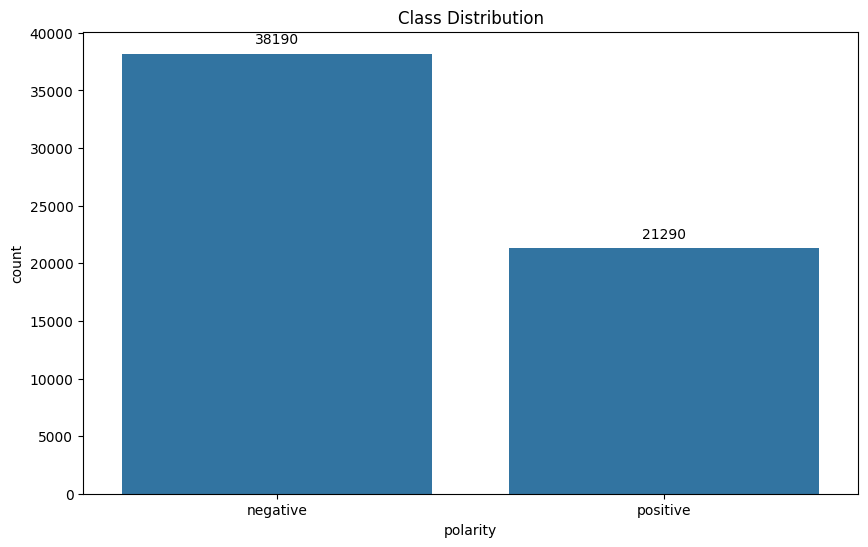

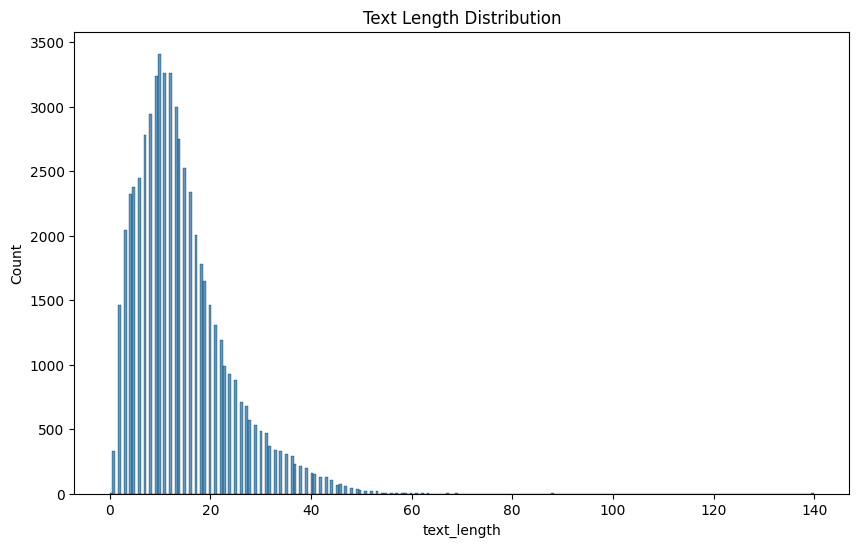

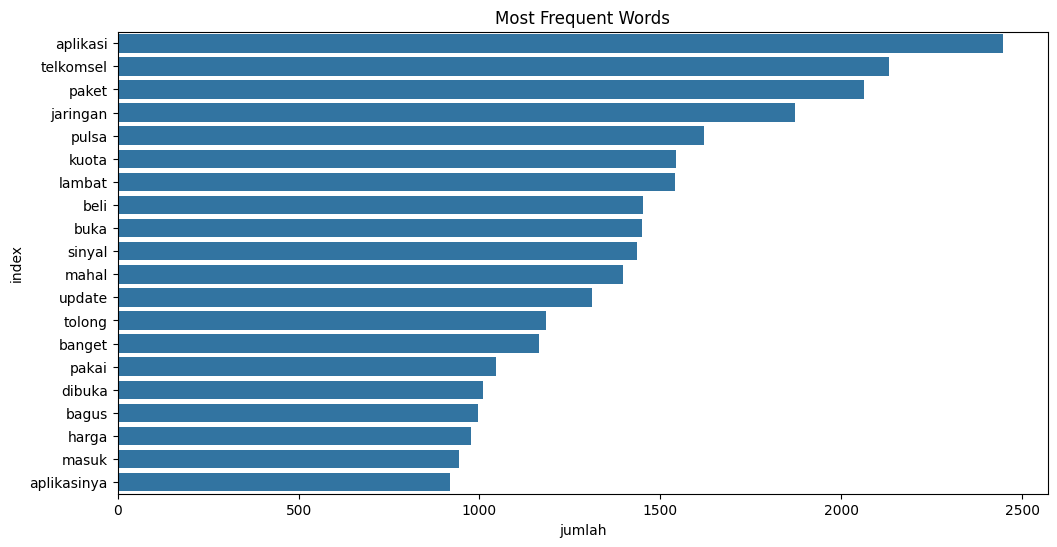

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

# Data Spliting

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

In [ ]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

# Extrasi dengan TF-IDF

In [ ]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [ ]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,akses,aktif,akun,ampun,aneh,apk,aplikasi,aplikasinya,app,bagus,...,tuh,uang,udh,ulang,unlimited,update,utama,versi,wifi,youtube
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.536421,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.209408,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.388073,0.199657,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.460704,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.289273,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.820662,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.333619,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.225038,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59475,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59476,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59477,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59478,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Logistik regression + TF-IDF + 80:20

In [ ]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.870986045729657
Logistic Regression - accuracy_test: 0.86726630800269


# Random Forest + TF-IDF + 80: 30

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)
# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.990128734748775
Random Forest - accuracy_test: 0.8364716431293432


# Deep learning + TF-IDF + 80:20

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Buat model lebih cepat dengan Dense Network (tanpa embedding)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_tfidf.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0,5),
    Dense(2, activation='softmax')  # 2 output (negative/positive)
])

# Compile Model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Tampilkan Arsitektur Model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                     │ (None, 128)                 │          25,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,114 (133.26 KB)

 Trainable params: 34,114 (133.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(clean_df['text_akhir']).toarray()  # Convert to dense array


encoder = LabelEncoder()
y_encoded = encoder.fit_transform(clean_df['polarity'])  # Ubah 'negative' dan 'positive' jadi 0 & 1

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=16, verbose=1)


train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]

print(f"Akurasi Train: {train_acc:.4f}")
print(f"Akurasi Test: {test_acc:.4f}")


Epoch 1/15
2974/2974 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8128 - loss: 0.3938 - val_accuracy: 0.8554 - val_loss: 0.3320
Epoch 2/15
2974/2974 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8662 - loss: 0.3172 - val_accuracy: 0.8652 - val_loss: 0.3232
Epoch 3/15
2974/2974 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8749 - loss: 0.3017 - val_accuracy: 0.8612 - val_loss: 0.3278
Epoch 4/15
2974/2974 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8855 - loss: 0.2812 - val_accuracy: 0.8531 - val_loss: 0.3444
Epoch 5/15
2974/2974 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8916 - loss: 0.2649 - val_accuracy: 0.8552 - val_loss: 0.3442
Epoch 6/15
2974/2974 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9051 - loss: 0.2391 - val_accuracy: 0.8507 - val_loss: 0.3636
Epoch 7/15
2974/2974 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9102 - loss: 0.2215 - val_accuracy: 0.8469 - val_loss: 0.3858
Epoch 8/15
2974/2974 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9154 - loss: 0

In [ ]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final]).toarray()  # Mengubah kalimat menjadi vektor TF-IDF

# Memperoleh prediksi sentimen kalimat baru dengan model deep learning
prediksi_sentimen = model.predict(X_kalimat_baru)  # Menggunakan model yang sudah dilatih

# Mengubah hasil prediksi menjadi label yang bisa dibaca
prediksi_label = encoder.inverse_transform([prediksi_sentimen.argmax(axis=1)[0]])  # Mendapatkan label yang sesuai

# Menampilkan hasil prediksi
if prediksi_label[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")


Masukkan kalimat baru: jelek
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
Sentimen kalimat baru adalah NEGATIF.


In [249]:
pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.2.1
aiohappyeyeballs==2.4.4
aiohttp==3.11.11
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
ale-py==0.10.1
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.6.0
arviz==0.20.0
astropy==6.1.7
astropy-iers-data==0.2025.1.27.0.32.44
astunparse==1.6.3
atpublic==4.1.0
attrs==25.1.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.34.0
bigquery-magics==0.5.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==3.0.0
bokeh==3.6.2
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.1
catalogue==2.0.10
certifi==2024.12.14
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.88
clarabel==0.9.0
click==8.1.8
cloudpathlib==0.20.0
cloudpickle==3.1.1
cmake==3.31.4
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy==1.3.1
